# The Bug and Rivet Paradox in Special Relativity
Check out http://hyperphysics.phy-astr.gsu.edu/hbase/Relativ/bugrivet.html .

# XY shapes in Loentz Frames

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd # For keeping track of all the t, x, y, z, etc coordinates and t' , x', y', z' .

## Some useful functions

In [2]:
def rotmat( eulerAngles ):
    """Rotation matrix with three Euler angles as defined in physics, i.e. Goldstein, Fig. 5.7 p 209.
    Order is rotate around z, then x, then z (new z) with angles phi, theta, and psi, resp.
    Assumes 3D.  Returns matrix.
    """
    (phi, th, psi) = eulerAngles
    cc = np.cos(phi)
    ss = np.sin(phi)
    mat1 = np.array( [ [cc, -ss, 0],
                        [ss, cc, 0],
                         [0, 0, 1] ] )
    cc = np.cos(th)
    ss = np.sin(th)
    mat2 = np.array( [])
    cc = np.cos(ph)
    ss = np.sin(phi)
    

In [3]:
# Class for the Local Lorentz Frame, especially translating S' coords to S (lab) ones.
class LLF():
    """Gives some methods and data for a local observer, a Local Lorentz Frame,
    with a position and velocity in the original 'lab' frame.  
    For now, velocity is in the x-direction and y and z are perpendiculat to the motion.
    """
    def __init__(self, beta, ndim):
        #self.pos = np.array(pos)
        self.beta = np.array(beta)
        self.ndim = ndim

        # Check dimensions are same.
        #self.checkDim()
        self.gamma = self.mygamma()
        # Calculate the t-x part of the matrix, mult (t,x)^T to get (t', x')^T .
        self.mat_tx, self.inv_mat_tx = self.txmatrix()
        #
        self.mat_all, self.inv_mat_all = self.allmatrix()
            
#     def getpos(self):
#         return( self.pos )
#     def setpos(self, pos):
#         self.pos = pos
    def getbeta(self):
        return( self.beta )
    def setbeta(self, beta): # Recalculate all the matrices.
        self.beta = beta
        self.gamma = self.mygamma()
        self.mat_tx, self.inv_mat_tx = self.txmatrix()
        self.mat_all, self.inv_mat_all = self.allmatrix()
        return(True)
    def getndim(self):
        return( self.ndim )
    def setndim(self, ndim):
        if ndim<=0:
            print('***Error, setndim: ndim is 0 or negative, {}, using 2'.format(ndim) )
            self.ndim = 2
            return(self.ndim)
        self.ndim = ndim
        return( True )
    
    def getmat_tx(self):
        return(self.mat_tx)

    def getmat_all(self):
        return(self.mat_all)
    
    def getinv_mat_tx(self):
        return(self.inv_mat_tx)
    
    def getinv_mat_all(self):
        return(self.inv_mat_all)
    
    
    def checkDim(self, pos):
        # Check dimensions are same.
        if len(pos) != self.ndim:
            print('***ERROR in class LLF, position has dims {} and ndim is {}'.format(len(pos), self.ndim ) )
            return(False)
        return(True)
            
    def mygamma(self):
        return( np.sqrt(1/(1-self.beta*self.beta) ) )
    
            
    def txmatrix(self):
        """Calculate just the t-x part of the matrix.  Recall that transverse dimensions are not changed.
        """
        if self.beta == 0:
            amat = np.identity(2)
            self.mat_tx = amat
            return(amat)
        
        gg = self.gamma
        bb = self.beta
        amat = np.array( [ [gg, -gg*bb], [-gg*bb, gg] ] )
        amatinv = np.linalg.inv(amat)
        return( (amat, amatinv) )
    
    def allmatrix(self):
        """Calculate the full t, x, y, z, ... matrix.
        """
        txmat = self.mat_tx
        # Other components are 1's along the diagonal.
        amat = np.identity(self.ndim)
        amat[0,0] = txmat[0,0]
        amat[0,1] = txmat[0,1]
        amat[1,0] = txmat[1,0]
        amat[1,1] = txmat[1,1]
        
        amatinv = np.linalg.inv(amat)
        return( (amat, amatinv) )
    
    def transTXY(self, pos):
        """Transform the S point [t, x, y]^T into the "moving" frame S'.
        """
        if not self.checkDim(pos):
            return( np.zeros(self.ndim) )
        ###print('{}\n{}'.format( self.mat_all, pos ) )
        return( np.dot( self.mat_all, pos) )
    
    def transTPXPYP(self, posprime):
        """Transform from S' point [t', x', y']^T into the "lab" frame S.
        Use the inverse matrix / transform."""
        if not self.checkDim(posprime):
            return( np.zeros(self.ndim) )
        return( np.dot( self.inv_mat_all, posprime) )
    
    def transTXYmany(self, arr):
        """Takes arr, a "vector" of points (t, x, y) and transforms them to (t', x', y').
        """
        aa = []
        for apos in arr:
            aa.append( self.transTXY(apos) )
        return( np.array(aa) )
        
    def transTPXPYPmany(self, arr):
        """Takes arr, a "vector" of points (t', x', y') and transforms them to (t, x, y).
        """
        aa = []
        for apos in arr:
            aa.append( self.transTPXPYP(apos) )
        return( np.array(aa) )
        
        

In [4]:
testLLF = LLF(0.7, 2)

In [5]:
testLLF.getbeta()

array(0.7)

In [6]:
aa = testLLF.getmat_all()

In [7]:
bb = testLLF.getinv_mat_all()

In [8]:
np.dot(aa,bb)

array([[1.00000000e+00, 3.23663960e-17],
       [2.98185316e-17, 1.00000000e+00]])

In [9]:
aa=testLLF.getmat_all()
print(aa)

[[ 1.40028008 -0.98019606]
 [-0.98019606  1.40028008]]


In [10]:
testLLF.getinv_mat_all()

array([[1.40028008, 0.98019606],
       [0.98019606, 1.40028008]])

In [11]:
testLLF.transTXY( np.array([1.,2]) )

array([-0.56011203,  1.82036411])

In [12]:
testLLF.transTXYmany(np.array([[1,0],[0,3] ] ) )

array([[ 1.40028008, -0.98019606],
       [-2.94058818,  4.20084025]])

## Create hole in the S' restframe

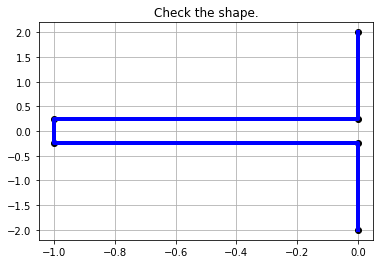

In [13]:
# Make it 1 deep and +/- 1/4 for y.  All in the x-y plane and time is t' = 0.0 say.
xdeep = 1.0
ywidth = 0.25
ysize = 2 # +/- the units in extent
# Append t later.
myHole = np.array([ [0.0, ysize], [0.0, ywidth], [-xdeep, ywidth], [-xdeep, -ywidth], [0.0, -ywidth], 
                   [.0, -ysize]  ])

xx = myHole.transpose()[0]
yy = myHole.transpose()[1]

plt.plot( xx, yy, 'ko', label='dots')
plt.plot( xx, yy, 'b-', label='lines', lw=4)
plt.title('Check the shape.')
plt.grid(True)
plt.show()

## Combine with time for 3-vector.

In [14]:
def prependTime(mypoints, tvalue):
    """Give a single time value, and it prepends that value to the x, y points as a numpy array.
    """
    xx = mypoints.transpose()[0]
    yy = mypoints.transpose()[1]
    tt = np.full(xx.shape, tvalue)  # Should create a numpy vector/array of the right size and shape.
    
    final= np.array([tt, xx, yy]).transpose()
    return(final)

In [15]:
myholeStart = prependTime(myHole, 0.0)

In [16]:
myholeStart  # This is in (t', x', y') space.

array([[ 0.  ,  0.  ,  2.  ],
       [ 0.  ,  0.  ,  0.25],
       [ 0.  , -1.  ,  0.25],
       [ 0.  , -1.  , -0.25],
       [ 0.  ,  0.  , -0.25],
       [ 0.  ,  0.  , -2.  ]])

In [17]:
# Find those points in (t, x, y ) space and then pick the points that are "simulataneous" in t.
myLLF = LLF(0.9, 3)
numTimes = 1001
aa = []
tprime = np.linspace(0.0, 12.0, numTimes, endpoint=True) # Clock is "slower" in S'... 
for tt in tprime:
    aa.append( prependTime( myHole, tt) )  # myHole is [[x',y']...] points.
    
myHoleTp = np.array( aa )
      

print('{}\n{}'.format(myHoleTp.shape, myHoleTp[0:2]) )

In [18]:
aa = []
icnt = 0
for ahole in myHoleTp:
    #print(icnt, '\t', ahole)
    bb = myLLF.transTPXPYPmany( ahole )
    #print(icnt, '\t', bb)
    aa.append( bb )
    icnt += 1
myHoleT = np.array( aa )

In [19]:
print('{}\n{}'.format(myHoleT.shape, myHoleT[0:2]) )

(1001, 6, 3)
[[[ 0.          0.          2.        ]
  [ 0.          0.          0.25      ]
  [-2.0647416  -2.29415734  0.25      ]
  [-2.0647416  -2.29415734 -0.25      ]
  [ 0.          0.         -0.25      ]
  [ 0.          0.         -2.        ]]

 [[ 0.02752989  0.0247769   2.        ]
  [ 0.02752989  0.0247769   0.25      ]
  [-2.03721172 -2.26938044  0.25      ]
  [-2.03721172 -2.26938044 -0.25      ]
  [ 0.02752989  0.0247769  -0.25      ]
  [ 0.02752989  0.0247769  -2.        ]]]


In [20]:
myLLF.getmat_all()

array([[ 2.29415734, -2.0647416 ,  0.        ],
       [-2.0647416 ,  2.29415734,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

## Create a panda with all the points in order, with some count for simultaneous in S' our starting shape

In [21]:
# Columns are id, t', x', y', t, x, y
# For clarity create a big numpy that is the above rows.
columns = ['tstamp', 'pt', 'tp', 'xp', 'yp', 't', 'x', 'y']
bigarr = np.zeros( shape=( len(myHoleTp)*len(myHoleTp[0]), len(columns) ) ) # , dtype=np.float

for ii in range(len(myHoleTp)):   # This runs over the simult times in S', a collection of points for the shape.
    alen = len(myHoleTp[ii])
    for jj in range( alen ):   # Run over each point in the shape.
        aa = myHoleTp[ii][jj]
        bb = myHoleT[ii][jj]
#         if ii < 10:
#             print('ii {}\t jj {}'.format(ii,jj))
        bigarr[ii*alen+jj] = np.array( [ii, jj, aa[0], aa[1], aa[2], bb[0], bb[1], bb[2] ] )
    
mypoints = pd.DataFrame( bigarr, columns = columns)

In [22]:
mypoints.head(10)
#len(mypoints)

,tstamp,pt,tp,xp,yp,t,x,y
0,0.0,0.0,0.000,0.0,2.00,0.000000,0.000000,2.00
1,0.0,1.0,0.000,0.0,0.25,0.000000,0.000000,0.25
2,0.0,2.0,0.000,-1.0,0.25,-2.064742,-2.294157,0.25
3,0.0,3.0,0.000,-1.0,-0.25,-2.064742,-2.294157,-0.25
4,0.0,4.0,0.000,0.0,-0.25,0.000000,0.000000,-0.25
5,0.0,5.0,0.000,0.0,-2.00,0.000000,0.000000,-2.00
6,1.0,0.0,0.012,0.0,2.00,0.027530,0.024777,2.00
7,1.0,1.0,0.012,0.0,0.25,0.027530,0.024777,0.25
8,1.0,2.0,0.012,-1.0,0.25,-2.037212,-2.269380,0.25
9,1.0,3.0,0.012,-1.0,-0.25,-2.037212,-2.269380,-0.25


## Now sort by t, looking for simultaneous points there which will come from different tp values.

In [23]:
#mypoints.sort_values(by=['t'])  # 101 time tp points not good enough!!  Try 1001 and then new strategy.

## Try drawing lines in tp, x, y, space for each "node" and then find the intersection in the t = constant plane
The lines are straight forward in the S', just vertical as t' marches forward.  Let our class calculate a slope and intersection for each of the "nodes" in our shape??<br>
For the Lorentz transformation<br>
$$ {\bf x}' = L\cdot {\bf x}$$
Consider that the shapes, or the nodes of the shape make lines in $(t', x', y')$ and in fact are vertical with $(x', y')$ unchanging.  So consider the $S'$ lines to be
$$ {\bf x}'(u) = {\bf x}'_0 + {\bf m}' u$$
and we treat $u$ as a stand in for $t'$, so that ${\bf m}' = (1,0,0)$, say.  Then transform the lines in $S'$ into $S$ (the "lab" frame).<br>
$$ {\bf x}(u) = L^{-1}\cdot {\bf x}'_0 + L^{-1}\cdot {\bf m}'\; u$$
And we find slices in $t$ by finding $u$ from <br>
$$ u = \big( t - L^{-1}\cdot {\bf x}'_0 \big)/( L^{-1}\cdot {\bf m}' )_t$$
And we can select out a set of $t$'s that match up with the other part of the problem, the rivet.



In [24]:
# Try out a "shape" class that inherits(??) a Lorentz transformation, a Lorentz frame from above.
class LorShape(LLF):
    """Assuming a shape in the x'-y' plane of S' that is fixed and just moving vertically in S'
    """
    def __init__(self, beta, ndim, xp0, mp):
        """beta is the speed, ndim is number of dimensions to work in, usually 2 or 3,
        xp0 is the numpy array of [t', x', y', ...] at start, u=0, and mp is the slope of these
        lines in the S' frame, typicall [1, 0, 0)], as the shape at rest in S' just moves vertically.
        numpoints is the number of points in the shape.  These will be treated like lines in S' and S.
        """
        LLF.__init__(self, beta, ndim)  # Initialize the Local Lorentz frame variables and methods.
        self.ndim = ndim
        self.xp0 = xp0
        self.mp = mp
        self.numpoints = len(xp0)
        
        self.checkSize()
        
        self.x0 = self.calcX0()
        self.m = self.calcM()
        
    def checkSize(self):
        if len(self.xp0) != len(self.mp):
            print('***Error, LorShape, checkSize: xp0 and mp different sizes, {}, {}, resp.'.
                  format(len(self.xp0), len(self.mp) ) )
            return(False)
        if len(self.xp0[0]) != self.ndim:
            print('***Error, LorShape, checkSize: len(xp0[0]) and ndim different, {}, {}, resp.'.
                  format(len(self.xp0[0]), self.ndim) )
            return(False)
        return(True)
    
    def calcX0(self):
        return( self.transTPXPYPmany(self.xp0) )
    
    def calcM(self):
        return( self.transTPXPYPmany(self.mp) )
        
    def ufromt(self, ptindex, tt):
        """Given a point index on the set of shape points, ptindex, calculate the u value for 
        the given t (in S) value.  Returns u or 0.0 if there is a divide by 0 problem."""
        xx0 = self.x0[ptindex]
        mm = self.m[ptindex]
        if mm[0] != 0:
            uu = (tt - xx0[0])/mm[0]
            return(uu)
        else:
            print('***Error, LorShape, ufromt: mm[0] is zero! Divide by zero.')
            print('***                       : (t-x0[0] is {}, m[0] is {})'.format((tt-xx0[0]), mm[0]) )
            return(0.0)
        
    def ufromtp(self, ptindex, ttp):
        """Given a point index on the set of shape points, ptindex, calculate the u value for 
        the given t (in S) value.  Returns u or 0.0 if there is a divide by 0 problem."""
        xxp0 = self.xp0[ptindex]
        mmp = self.mp[ptindex]
        if mmp[0] != 0:
            uu = (ttp - xxp0[0])/mmp[0]
            return(uu)
        else:
            print('***Error, LorShape, ufromt: mm[0] is zero! Divide by zero.')
            print('***                       : (t-x0[0] is {}, m[0] is {})'.format((tt-xx0[0]), mm[0]) )
            return(0.0)
        
    def shapeXAtT(self, tt):
        """Return the shape array in S frame at the given time t (in S).
        """
        # Run over the points.
        xnew = np.zeros( (len(self.x0), self.ndim) )
        for ptindex, (aa, bb) in enumerate( zip(self.x0, self.m) ):
            uu = self.ufromt(ptindex, tt)
            xnew[ptindex] = aa + bb*uu
        return(xnew)
        
    def shapeXPAtTP(self, ttp):
        """Return the shape array in S frame at the given time t (in S).
        """
        # Run over the points.
        xpnew = np.zeros( (len(self.xp0), self.ndim) )
        for ptindex, (aa, bb) in enumerate( zip(self.xp0, self.mp) ):
            uu = self.ufromtp(ptindex, ttp)
            xpnew[ptindex] = aa + bb*uu
        return(xpnew)
       

In [25]:
myHole

array([[ 0.  ,  2.  ],
       [ 0.  ,  0.25],
       [-1.  ,  0.25],
       [-1.  , -0.25],
       [ 0.  , -0.25],
       [ 0.  , -2.  ]])

In [26]:
myHoleStart = prependTime(myHole, 0.0)
#myMpStart = np.zeros( (len(myHoleStart), len(myHoleStart[0]) ) )
myMpStart = np.array( [ np.array([1.0, 0, 0]) for uu in myHoleStart ] )
aShape = LorShape( 0.9, 3, myHoleStart, myMpStart )

In [27]:
aShape.gamma

2.294157338705618

In [28]:
np.sqrt( 1.0/(1.0-0.9*0.9) )

2.294157338705618

In [29]:
numtps = 11
tpSlices = np.linspace(0, 10, numtps, endpoint=True)

In [30]:
aa = []
for tt in tpSlices: # Check the lines in the S' frame.
    aa.append( aShape.shapeXPAtTP(tt) )
myHoleP = np.array( aa )

In [31]:
(myHoleP[5], tpSlices[5])

(array([[ 5.  ,  0.  ,  2.  ],
        [ 5.  ,  0.  ,  0.25],
        [ 5.  , -1.  ,  0.25],
        [ 5.  , -1.  , -0.25],
        [ 5.  ,  0.  , -0.25],
        [ 5.  ,  0.  , -2.  ]]), 5.0)

In [32]:
tpSlices

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [33]:
aShape.mp

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [34]:
aShape.xp0

array([[ 0.  ,  0.  ,  2.  ],
       [ 0.  ,  0.  ,  0.25],
       [ 0.  , -1.  ,  0.25],
       [ 0.  , -1.  , -0.25],
       [ 0.  ,  0.  , -0.25],
       [ 0.  ,  0.  , -2.  ]])

In [35]:
aa = []
for tt in tpSlices: # Check the lines in the S' frame.
    aa.append( aShape.shapeXAtT(tt) )
myHoleT = np.array( aa )

In [36]:
myHoleT[4]

array([[ 4.        ,  3.6       ,  2.        ],
       [ 4.        ,  3.6       ,  0.25      ],
       [ 4.        ,  3.16411011,  0.25      ],
       [ 4.        ,  3.16411011, -0.25      ],
       [ 4.        ,  3.6       , -0.25      ],
       [ 4.        ,  3.6       , -2.        ]])

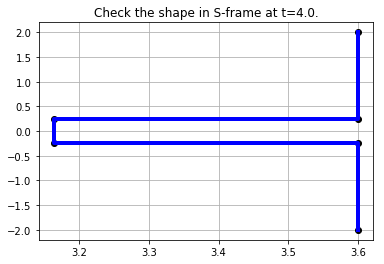

In [42]:
xx = myHoleT[4].transpose()[1]
yy = myHoleT[4].transpose()[2]

plt.plot( xx, yy, 'ko', label='dots')
plt.plot( xx, yy, 'b-', label='lines', lw=4)
plt.title('Check the shape in S-frame at t={}.'.format(myHoleT[4][0][0]) )
plt.grid(True)
plt.show()
#
#  Depth is 3.6-3.164 = 
#

In [38]:
# Depth of above
aa = 3.6-3.164
print('depth is {}'.format(aa) )

depth is 0.43599999999999994


In [39]:
( aShape.gamma, 1.0/aShape.gamma )

(2.294157338705618, 0.4358898943540673)

In [40]:
# Pick a line in the RGB space, that takes a w from 0 to 1.
def contRGB(ww):
    """Give ww from 0 to 1 for the span of colors (0,0,0) to (255, 255, 255) .
    """
    tdir = np.array([0.2, 0.3, 0.5])
    tdir = tdir/ np.sqrt( np.dot(tdir, tdir) )  # Normalize the direction vector.
    dist = np.sqrt( 256*256*3 )
    rgbVec = np.array([0,0,0])*(1-ww) + tdir*ww*dist

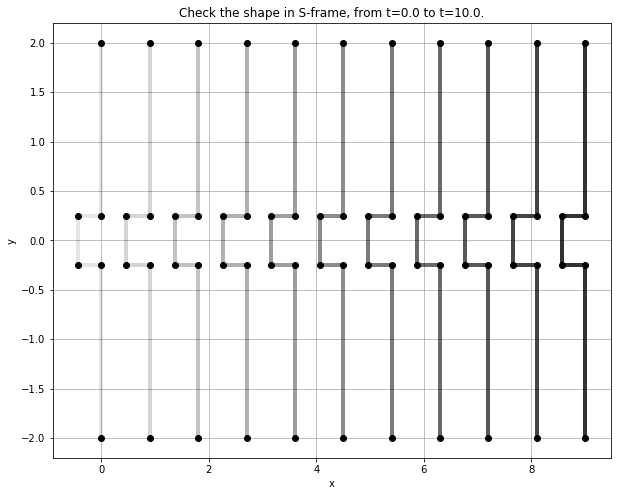

In [53]:
import matplotlib.colors as mcols
# Plot all the time slices, play with colors and opacity.
#cm = mcols.hsv_to_rgb( len(tpSlices) )
alphas = np.linspace(0.1, 0.8, len(tpSlices) )
#alphas = np.logspace(np.log(0.1), np.log(1.0), len(tpSlices) )

fig, ax = plt.subplots( figsize = (10,8) )

for alf, aHole in zip(alphas, myHoleT):
    xx = aHole.transpose()[1]
    yy = aHole.transpose()[2]
    ax.plot( xx, yy, 'ko', label='dots')
    ax.plot( xx, yy, 'k-', label='lines', lw=4, alpha=alf)
plt.title('Check the shape in S-frame, from t={} to t={}.'.format(myHoleT[0][0][0],myHoleT[-1][0][0]) )
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

if 1: plt.savefig('MovingHole.png')
plt.show()

## A little quicker to the calculation (no pandas) and new Hole as a closed region.

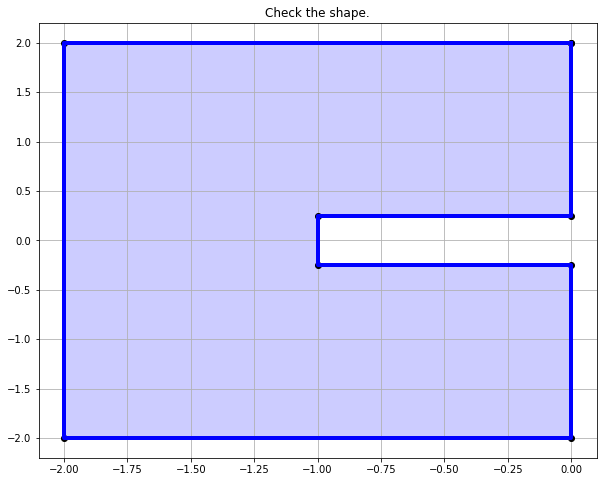

In [84]:
# Draw a closed polygon as a starting shape at t'=0, and will move by m' .
#
# Make it 1 deep and +/- 1/4 for y.  All in the x-y plane and time is t' = 0.0 say.
xdeep = 1.0
ywidth = 0.25
ysize = 2 # +/- the units in extent
xback = 2.0
# Append t later.
myHoleB = np.array([ [0.0, ysize], [0.0, ywidth], [-xdeep, ywidth], [-xdeep, -ywidth], [0.0, -ywidth], 
                   [.0, -ysize], [-xback, -ysize], [-xback, ysize], [0.0, ysize]  ])

fig, ax = plt.subplots( figsize=(10,8) )

xx = myHoleB.transpose()[0]
yy = myHoleB.transpose()[1]

ax.fill( xx, yy, 'b', alpha=0.2)


ax.plot( xx, yy, 'ko', label='dots')
ax.plot( xx, yy, 'b-', label='lines', lw=4)
plt.title('Check the shape.')
plt.grid(True)
plt.show()

In [70]:
# Set up the Lorentz Shape class.
myHoleBStart = prependTime(myHoleB, 0.0)
myMpStart = np.array( [ np.array([1.0, 0, 0]) for uu in myHoleBStart ] )

bShape = LorShape( 0.8, 3, myHoleBStart, myMpStart )

In [71]:
( bShape.gamma, 1/bShape.gamma, np.sqrt(1/(1-0.8*0.8)) )

(1.666666666666667, 0.5999999999999999, 1.666666666666667)

In [85]:
#  Evolve the S' starting hole in the S'-frame.  Boring.
#
numtps = 11  # t' slices here...
tpSlices = np.linspace(0, 10, numtps, endpoint=True)

aa = []
for tt in tpSlices: # Check the lines in the S' frame.
    aa.append( bShape.shapeXPAtTP(tt) )  # Evolve the shape to time tt.
myHoleBP = np.array( aa )  # Collection of points for the shapes evolved for times tpSlices.

In [90]:
#  Evolve the S' starting hole in the S-frame.
#
numts = 21  # t' slices here...
tSlices = np.linspace(0, 14, numtps, endpoint=True)

aa = []
for tt in tSlices: # Check the lines in the S frame.
    aa.append( bShape.shapeXAtT(tt) )
myHoleBT = np.array( aa )

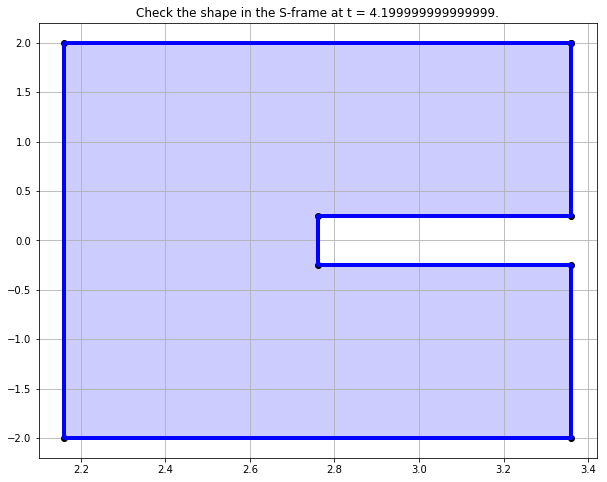

In [91]:
fig, ax = plt.subplots( figsize=(10,8) )
tind = 3
tpick = tSlices[tind]

xx = myHoleBT[tind].transpose()[1]
yy = myHoleBT[tind].transpose()[2]

ax.fill( xx, yy, 'b', alpha=0.2)


ax.plot( xx, yy, 'ko', label='dots')
ax.plot( xx, yy, 'b-', label='lines', lw=4)
plt.title('Check the shape in the S-frame at t = {}.'.format( tpick ))
plt.grid(True)
plt.show()

In [92]:
print('{}\n\n{}'.format( myHoleBT[tind], myHoleBP[tind] ) )

[[ 4.2   3.36  2.  ]
 [ 4.2   3.36  0.25]
 [ 4.2   2.76  0.25]
 [ 4.2   2.76 -0.25]
 [ 4.2   3.36 -0.25]
 [ 4.2   3.36 -2.  ]
 [ 4.2   2.16 -2.  ]
 [ 4.2   2.16  2.  ]
 [ 4.2   3.36  2.  ]]

[[ 3.    0.    2.  ]
 [ 3.    0.    0.25]
 [ 3.   -1.    0.25]
 [ 3.   -1.   -0.25]
 [ 3.    0.   -0.25]
 [ 3.    0.   -2.  ]
 [ 3.   -2.   -2.  ]
 [ 3.   -2.    2.  ]
 [ 3.    0.    2.  ]]


In [93]:
# Check the length contraction.
( 3.36-2.76, 1.0/bShape.gamma )

(0.6000000000000001, 0.5999999999999999)